In [88]:
import src.simulation as sim
import numpy as np
import pandas as pd
import src.sample as smp
import matplotlib.pyplot as plt
import src.exports as exp

In [4]:
sample = smp.genSample('Basic Linear',250,tau=0.3,alpha=-0.15,beta=1,L=200,outlier=False,outlierMethod='Simple Outside', nOutliers=5,printPlot=False)

In [50]:
sample = pd.read_csv("application/data.csv")
      

In [51]:
sample

,Unnamed: 0,Y,X,Treatment
0,0,0.0,1418.0,1.0
1,1,0.0,1418.0,1.0
2,2,0.0,1418.0,1.0
3,3,0.0,1418.0,1.0
4,4,0.0,1418.0,1.0
...,...,...,...,...
32505,32505,0.0,1580.0,0.0
32506,32506,0.0,1545.0,0.0
32507,32507,0.0,1470.0,1.0
32508,32508,0.0,1559.0,0.0


<Axes: >

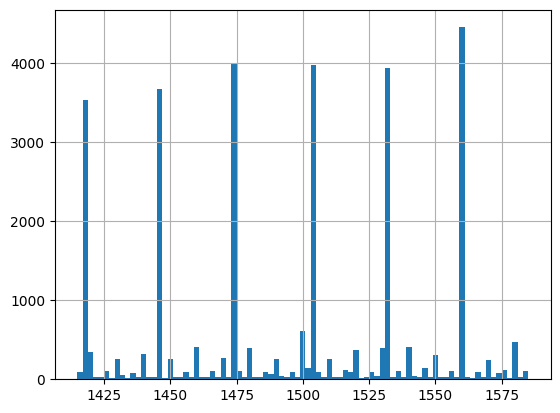

In [52]:
sample.X.hist(bins= 85)

In [46]:
Y_avgs = {}
X = {}
for i in range(1415,1586):
    Y_avgs = np.append(Y_avgs, sample.loc[sample.X==i].mean().iloc[1])
    X = np.append(X, i)

Y_avgs = np.delete(Y_avgs,0)
X = np.delete(X,0)
sample = pd.DataFrame(
    {
        "Y": Y_avgs,
        "X": X,
        "Treatment": smp.genT(X,1500,False),
    }
)

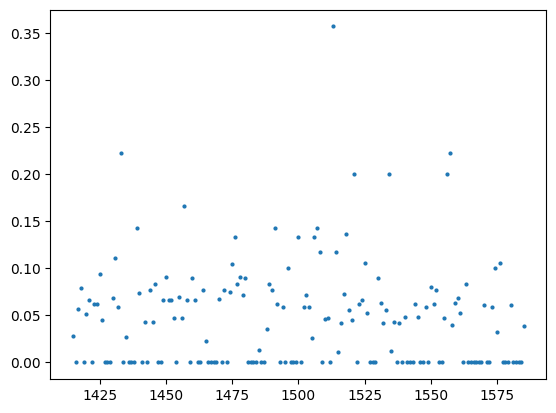

In [49]:
plt.scatter(sample.X,sample.Y,s=4)

In [53]:
from src.sample import genT
df_02 = pd.read_csv("application/LinkCO02USDEN.dat", header=None)

Deaths = {}
Weights = {}
for df in [df_02]:
    for i in range(len(df)):
        weight = int(df.iloc[i][0][80:84])
        death = int(df.iloc[i][0][0])
        if (1415 <= weight) & (weight <= 1585):
            Weights = np.append(Weights, weight)
            if death == 2:
                Deaths = np.append(Deaths, 0)
            else:
                Deaths = np.append(Deaths, 1)

Deaths = np.delete(Deaths, 0)
Weights = np.delete(Weights, 0)

sample = pd.DataFrame(
    {
        "Y": Deaths,
        "X": Weights,
        "Treatment": genT(Weights,1500,False),
    }
)
sample.Y = sample.Y.astype(float)
sample.X = sample.X.astype(float)
sample.Treatment = sample.Treatment.astype(float)

In [56]:
sample

,Y,X,Treatment
0,0.0,1474.0,1.0
1,0.0,1440.0,1.0
2,0.0,1418.0,1.0
3,0.0,1580.0,0.0
4,0.0,1452.0,1.0
...,...,...,...
13570,0.0,1580.0,0.0
13571,0.0,1545.0,0.0
13572,0.0,1470.0,1.0
13573,0.0,1559.0,0.0


AttributeError: 'Axes' object has no attribute 'savefig'

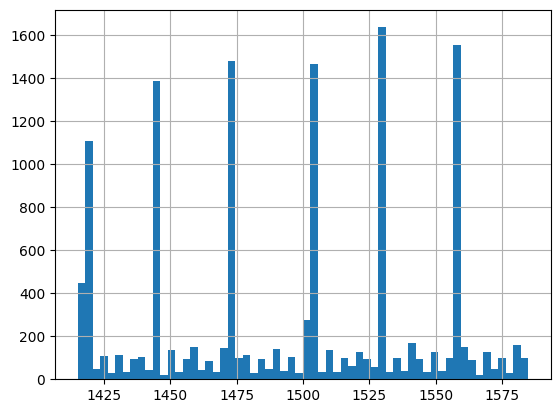

In [64]:
sample.X.hist(bins=60).savefig("images/application/histApplication.png")

C:\Temp\ipykernel_3740\1061799264.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


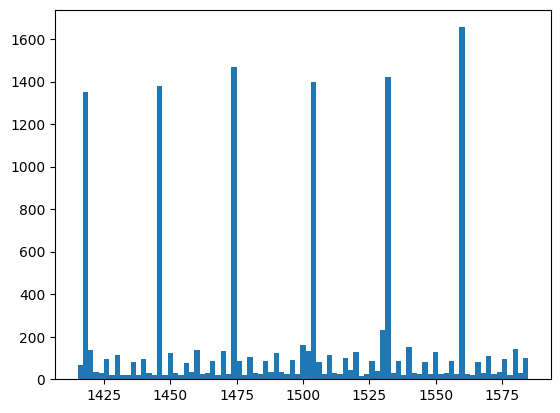

In [66]:
fig = plt. figure()
ax = fig.subplots()
ax.hist(sample.X, bins= 85)

fig.show()

In [59]:
sample.loc[sample.X==i].mean()

Y               0.044118
X            1585.000000
Treatment       0.000000
dtype: float64

In [94]:
from src.sample import genT

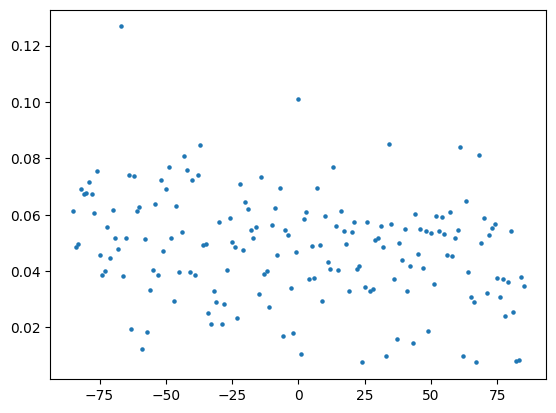

In [100]:
sample = pd.read_csv("application/data.csv")
# Transform data
Y_avgs = {}
X = {}
for i in range(1415,1586):
    Y_avgs = np.append(Y_avgs, sample.loc[sample.X==i].mean().iloc[0])
    X = np.append(X, i-1500)

Y_avgs = np.delete(Y_avgs,0)
X = np.delete(X,0)
sampleTrans = pd.DataFrame(
    {
        "Y": Y_avgs,
        "X": X,
        "Treatment": genT(X,-0.1,False),
    }
)
sampleTrans.Y = sampleTrans.Y.astype(float)
sampleTrans.X = sampleTrans.X.astype(float)
sampleTrans.Treatment = sampleTrans.Treatment.astype(float)

# Save data
plt.scatter(sampleTrans.X, sampleTrans.Y, s=5)
sampleTrans.to_csv("application/dataTransformed.csv", index=False)

In [90]:
from src.exports import plotApplicationFigure

ImportError: cannot import name 'plotApplicationFigure' from 'src.exports' (c:\Users\cons046\OneDrive - Erasmus University Rotterdam\23-24\Thesis\5. Code\src\exports.py)

In [110]:
year_dummies = [{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}]



In [122]:
df = pd.read_csv("application/dataTransformed.csv")
df.X = df.X-1500
df


,Y,X,Treatment
0,0.026087,-85.0,1.0
1,0.000000,-84.0,1.0
2,0.048128,-83.0,1.0
3,0.035359,-82.0,1.0
4,0.032258,-81.0,1.0
...,...,...,...
166,0.000000,81.0,0.0
167,0.000000,82.0,0.0
168,0.000000,83.0,0.0
169,0.000000,84.0,0.0


In [118]:
year_dummies

[array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object),
 array([{}, 1, 1, 1], dtype=object)]